# step 1 : Scraping Content using libraries like  `BeautifulSoup` and `requests` 

In [1]:
import requests
from bs4 import BeautifulSoup

urls = [
    "https://en.wikipedia.org/wiki/Zambia",
    "https://en.wikipedia.org/wiki/Lusaka",
    "https://en.wikipedia.org/wiki/Geography_of_Zambia",
    "https://en.wikipedia.org/wiki/Economy_of_Zambia",
    "https://en.wikipedia.org/wiki/Zambia_Independence_Act_1964",
    "https://en.wikipedia.org/wiki/University_of_Zambia",
    "https://en.wikipedia.org/wiki/History_of_Church_activities_in_Zambia,",
    "https://en.wikipedia.org/wiki/Ministry_of_Health_(Zambia) ",
    "https://en.wikipedia.org/wiki/Nyika_Plateau",
    "https://en.wikipedia.org/wiki/Zambian_Defence_Force",
    "https://en.wikipedia.org/wiki/Zambian_kwacha",
    "https://en.wikipedia.org/wiki/Zambia_Railways",
    "https://en.wikipedia.org/wiki/Great_East_Road",
    "https://en.wikipedia.org/wiki/Great_North_Road,_Zambia"
]

data = []

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    content = soup.find('div', {'id': 'bodyContent'})
    sections = content.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

    for section in sections:
        header = section.text.strip()
        body = []
        for sibling in section.find_next_siblings():
            if sibling.name and sibling.name.startswith('h'):
                break
            body.append(sibling.text.strip())
        body = ' '.join(body)
        data.append((header, body))


# step 2 : preprocessing -> Clean the text data by removing references, special characters, and unnecessary whitespace

In [2]:
import re

def clean_text(text):
    text = re.sub(r'\[.*?\]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_data = [(header, clean_text(body)) for header, body in data]


# Exploratory Data Analysis (EDA) -> Here I analyzed the frequency of different section headers and the average length of content in each section.
# to do this I Used visualization tools like matplotlib or seaborn for this analysis.

In [4]:
# installation of seaborn
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 764.4 kB/s eta 0:00:0031m1.1 MB/s eta 0:00:01m


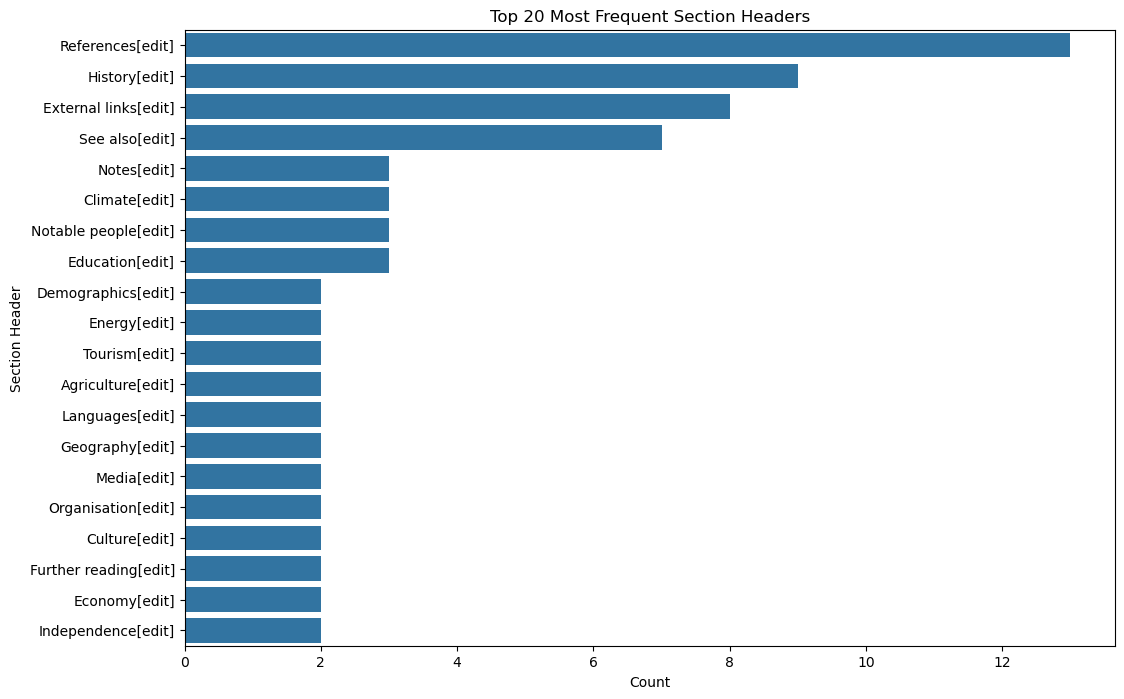

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(cleaned_data, columns=['Section', 'Content'])
section_counts = df['Section'].value_counts()

top_n = 20  # Adjust as necessary
top_section_counts = section_counts.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_section_counts.values, y=top_section_counts.index)
plt.title(f'Top {top_n} Most Frequent Section Headers')
plt.xlabel('Count')
plt.ylabel('Section Header')
plt.show()

# piechart

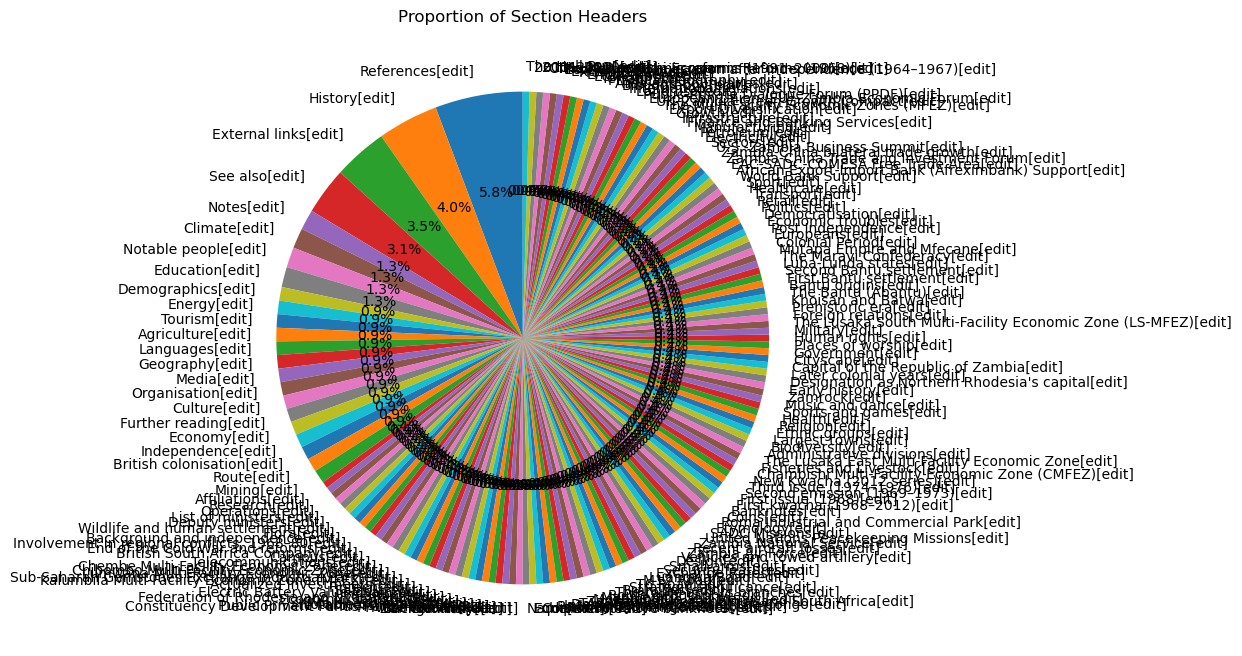

In [9]:
plt.figure(figsize=(12, 8))
section_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Section Headers')
plt.ylabel('')  # Hide the y-label
plt.show()


# word cloud

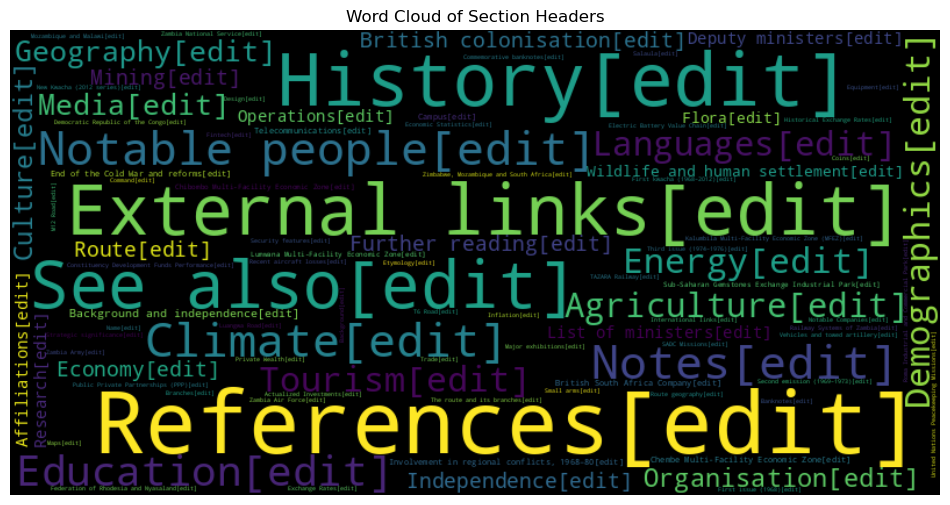

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(section_counts.to_dict())

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Section Headers')
plt.show()


# step 3 feature engineering -> Here I extract features from the text using techniques like TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Content'])
y = df['Section']


# step 4 Model Training and Evaluation -> using sklearn

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.043478260869565216
                                                               precision    recall  f1-score   support

                                           Affiliations[edit]       0.00      0.00      0.00         1
       African Export-Import Bank (Afreximbank) Support[edit]       0.00      0.00      0.00         1
                                    Area and boundaries[edit]       0.00      0.00      0.00         1
                                             Background[edit]       0.00      0.00      0.00         1
                                              Banknotes[edit]       0.00      0.00      0.00         1
                                           Biodiversity[edit]       0.00      0.00      0.00         1
                           British South Africa Company[edit]       0.00      0.00      0.00         1
                                   British colonisation[edit]       0.00      0.00      0.00         1
         Chambishi Multi-Facility Economi

/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/sit

 # step 5 -> generating new section outline
 # to do this I will feed the model a new sentence

In [16]:
import re

# Sample new article text
new_article_text = """
Zambia has had a lot of loadshedding this year. The country hardly had any rain last year...
The economic impact has been significant, affecting both businesses and households...
Efforts are underway to address the energy crisis, with investments in renewable energy sources...
"""

# Preprocess the text
def preprocess_text(text):
    text = re.sub(r'\[.*?\]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Split the text into chunks (you might want to refine this method)
def split_text_into_chunks(text):
    # This example splits the text into sentences for simplicity
    return re.split(r'(?<=\.)\s', text)

# Preprocess and split the new article text
new_article_chunks = split_text_into_chunks(preprocess_text(new_article_text))

# Check the chunks
print(f'Chunks: {new_article_chunks}')

# Transform the text chunks into features using the same TF-IDF vectorizer
X_new = vectorizer.transform(new_article_chunks)

# Predict section headers for each chunk
predicted_sections = model.predict(X_new)

# Combine the predicted section headers and text chunks into a structured outline
outline = {}
for section, content in zip(predicted_sections, new_article_chunks):
    if section not in outline:
        outline[section] = []
    outline[section].append(content)

# Print the generated section outline
for section, contents in outline.items():
    print(f"Section: {section}")
    for content in contents:
        print(content)
    print("\n")


Chunks: ['Zambia has had a lot of loadshedding this year.', 'The country hardly had any rain last year...', 'The economic impact has been significant, affecting both businesses and households...', 'Efforts are underway to address the energy crisis, with investments in renewable energy sources...']
Section: References[edit]
Zambia has had a lot of loadshedding this year.
The country hardly had any rain last year...
The economic impact has been significant, affecting both businesses and households...
Efforts are underway to address the energy crisis, with investments in renewable energy sources...




In [18]:
# Example training data (replace with your actual data)
data = [
    ('Introduction', 'Zambia is a country in Southern Africa...', 'Article1'),
    ('Geography', 'Zambia is landlocked and shares borders with...', 'Article1'),
    ('Economy', 'The economy of Zambia primarily depends on...', 'Article1'),
    # Add more training data here...
]

# Create DataFrame
df = pd.DataFrame(data, columns=['Section', 'Content', 'Article'])

# Check distribution of section headers
print(df['Section'].value_counts())

# Vectorize text content
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Content'])
y = df['Section']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model on test set
y_pred_test = model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

# Example new article text
new_article_text = """
Zambia has had a lot of loadshedding this year. The country hardly had any rain last year...
The economic impact has been significant, affecting both businesses and households...
Efforts are underway to address the energy crisis, with investments in renewable energy sources...
"""

# Preprocess the new article text
def preprocess_text(text):
    text = re.sub(r'\[.*?\]+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def split_text_into_chunks(text):
    return re.split(r'(?<=\.)\s', text)

new_article_chunks = split_text_into_chunks(preprocess_text(new_article_text))

# Check the chunks
print(f'Chunks: {new_article_chunks}')

# Transform the text chunks into features using the same TF-IDF vectorizer
X_new = vectorizer.transform(new_article_chunks)

# Predict section headers for each chunk
predicted_sections = model.predict(X_new)

# Check the predicted sections
print(f'Predicted Sections: {predicted_sections}')

# Combine the predicted section headers and text chunks into a structured outline
outline = {}
for section, content in zip(predicted_sections, new_article_chunks):
    if section not in outline:
        outline[section] = []
    outline[section].append(content)

# Print the generated section outline
for section, contents in outline.items():
    print(f"Section: {section}")
    for content in contents:
        print(content)
    print("\n")


Section
Introduction    1
Geography       1
Economy         1
Name: count, dtype: int64
Test Accuracy: 0.0
              precision    recall  f1-score   support

   Geography       0.00      0.00      0.00       0.0
Introduction       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Chunks: ['Zambia has had a lot of loadshedding this year.', 'The country hardly had any rain last year...', 'The economic impact has been significant, affecting both businesses and households...', 'Efforts are underway to address the energy crisis, with investments in renewable energy sources...']
Predicted Sections: ['Economy' 'Economy' 'Geography' 'Geography']
Section: Economy
Zambia has had a lot of loadshedding this year.
The country hardly had any rain last year...


Section: Geography
The economic impact has been significant, affecting both businesses an

/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/somo/.local/lib/python3.12/sit